In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Lectura base de datos

In [3]:
base_ndgi  = pd.read_table('ndgi.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=float) #Cargamos la base de datos y ignoramos las 6 primeras lineas.
base_dem  = pd.read_table('dem_2.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=float)
base_ndsi  = pd.read_table('ndsi.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=float)
base_ndsii  = pd.read_table('ndsii.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=float)
base_ndvi  = pd.read_table('ndvi.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=float)
base_nwi = pd.read_table('nwi.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=float)
base_glaciar = pd.read_table('glaciar.txt',sep=" ", skiprows = 6,header=None,decimal=',',dtype=object)


### Se puede ver que en todas las bases de datos, hay demasiados -9999 alrededor que representan no data,  por lo cual vamos a eliminarlos.

In [4]:
base_ndsii

,0,1,2,3,4,5,6,7,8,9,...,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293
0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
3,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
4,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
1417,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
1418,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN
1419,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN


In [5]:
base_ndgi = base_ndgi.iloc[15:1406,9:2284]  #Recorto las bases de datos para quitar el borde de -9999
base_dem = base_dem.iloc[15:1406,9:2284]
base_ndsi = base_ndsi.iloc[15:1406,9:2284]
base_ndsii = base_ndsii.iloc[15:1406,9:2284]
base_ndvi = base_ndvi.iloc[15:1406,9:2284]
base_nwi = base_nwi.iloc[15:1406,9:2284]
base_glaciar = base_glaciar.iloc[15:1406,9:2284]

In [6]:
base_ndgi

,9,10,11,12,13,14,15,16,17,18,...,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283
15,0.025163,0.027103,0.026979,0.021329,0.022098,0.022420,0.020640,0.024877,0.030885,0.036897,...,-0.008286,-0.006723,-0.006867,-0.005789,-0.005862,-0.009822,-0.010195,-0.008967,-0.007289,-0.008423
16,0.020011,0.024577,0.018691,0.017726,0.021873,0.023921,0.019730,0.023881,0.031509,0.037598,...,-0.007183,-0.007541,-0.008277,-0.009595,-0.009264,-0.003767,-0.005270,-0.002851,-0.002081,0.007666
17,0.024846,0.021616,0.018787,0.023959,0.025892,0.027613,0.025297,0.033597,0.035011,0.035591,...,-0.006321,-0.008119,-0.009595,-0.007820,-0.006115,-0.005258,-0.006915,-0.008312,-0.006643,-0.007638
18,0.025168,0.019560,0.018203,0.025038,0.031943,0.031358,0.032662,0.034749,0.033359,0.037503,...,-0.006742,-0.007150,-0.006956,-0.006489,-0.007017,-0.008836,-0.006862,-0.004438,-0.003316,-0.002952
19,0.023196,0.015906,0.023178,0.027348,0.029543,0.025280,0.024254,0.027875,0.029768,0.034773,...,-0.007240,-0.007775,-0.012285,-0.009349,-0.006547,-0.003383,-0.005435,-0.006269,-0.007071,-0.006486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.040104,0.038319,0.036033,0.034234,0.033283,0.034121,0.034029,0.035805,0.037886,0.037229,...,0.040718,0.038203,0.033263,0.051671,0.022136,0.016983,0.035065,0.025912,0.002284,0.006920
1402,0.036957,0.033970,0.034236,0.037126,0.034315,0.032307,0.031597,0.031656,0.032812,0.035140,...,0.042595,0.036283,0.025534,0.016670,0.023366,0.032107,0.034774,0.006792,-0.025427,0.005570
1403,0.036672,0.032677,0.031662,0.036927,0.036284,0.034562,0.031540,0.029372,0.030112,0.031662,...,0.050086,0.044934,0.028548,0.020348,0.020121,0.022962,0.017718,-0.003065,-0.001535,0.015044
1404,0.036711,0.033345,0.033098,0.033016,0.035309,0.036969,0.037931,0.031384,0.029142,0.032329,...,0.007817,0.032905,0.028804,0.029680,0.042254,0.043306,0.033189,-0.008249,-0.013435,-0.010381


In [7]:
base_glaciar

,9,10,11,12,13,14,15,16,17,18,...,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1404,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
base_ndsi

,9,10,11,12,13,14,15,16,17,18,...,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283
15,-0.172305,-0.178530,-0.187584,-0.196939,-0.198519,-0.185144,-0.191284,-0.192455,-0.175233,-0.158006,...,0.040391,0.039777,0.041798,0.037713,0.036676,0.038910,0.032852,0.018931,0.011331,0.005786
16,-0.189265,-0.179226,-0.196692,-0.207678,-0.201302,-0.180133,-0.179905,-0.181558,-0.160189,-0.148376,...,0.042436,0.040907,0.043275,0.041775,0.036938,0.038285,0.042203,0.029050,0.019289,0.009721
17,-0.181767,-0.184856,-0.206557,-0.203798,-0.190129,-0.169844,-0.177381,-0.164035,-0.147716,-0.147311,...,0.043579,0.040642,0.044497,0.042632,0.039934,0.036373,0.038423,0.038608,0.028258,0.023262
18,-0.194362,-0.192754,-0.211670,-0.202159,-0.195250,-0.179843,-0.190481,-0.177111,-0.145056,-0.149316,...,0.045624,0.040988,0.040924,0.042889,0.047752,0.045953,0.044959,0.042756,0.034961,0.028698
19,-0.199780,-0.210215,-0.209591,-0.203647,-0.203587,-0.212015,-0.206828,-0.190093,-0.164885,-0.168225,...,0.051020,0.046525,0.046948,0.043441,0.048722,0.053671,0.052190,0.044176,0.041950,0.035268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,-0.199687,-0.202937,-0.186289,-0.166557,-0.165144,-0.167410,-0.179430,-0.177436,-0.196595,-0.187706,...,-0.196968,-0.208129,-0.217366,-0.198803,-0.216576,-0.211012,-0.190270,-0.214839,-0.240661,-0.243541
1402,-0.199383,-0.188595,-0.187205,-0.187743,-0.170361,-0.162210,-0.162391,-0.185182,-0.183422,-0.184880,...,-0.226251,-0.241810,-0.253270,-0.244531,-0.235134,-0.202465,-0.192015,-0.264289,-0.300396,-0.242569
1403,-0.194300,-0.166221,-0.164510,-0.187147,-0.181332,-0.162886,-0.168515,-0.168913,-0.172856,-0.171684,...,-0.236877,-0.247608,-0.239866,-0.238642,-0.265776,-0.225083,-0.223424,-0.297157,-0.257265,-0.257926
1404,-0.198851,-0.159238,-0.179585,-0.171419,-0.179157,-0.182817,-0.185900,-0.176940,-0.174575,-0.164690,...,-0.292611,-0.254048,-0.223482,-0.232166,-0.223633,-0.225327,-0.213994,-0.274612,-0.289066,-0.291828


In [9]:
base_ndvi

,9,10,11,12,13,14,15,16,17,18,...,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283
15,0.389118,0.417656,0.428699,0.419676,0.417011,0.408334,0.409260,0.413963,0.413393,0.419596,...,0.022668,0.023335,0.021355,0.023124,0.024728,0.025482,0.022297,0.023700,0.029597,0.043762
16,0.379990,0.408781,0.407444,0.415214,0.410871,0.393971,0.394934,0.405177,0.409334,0.406765,...,0.021220,0.021072,0.021378,0.022056,0.024094,0.028973,0.027062,0.026912,0.029732,0.038379
17,0.399153,0.400567,0.407182,0.423943,0.419160,0.400007,0.415797,0.424692,0.411160,0.413878,...,0.020762,0.024287,0.024733,0.025033,0.024324,0.024126,0.023903,0.023977,0.025000,0.026843
18,0.414412,0.403865,0.400941,0.421234,0.443814,0.435093,0.439609,0.431622,0.400221,0.402016,...,0.020172,0.020440,0.021608,0.024250,0.023425,0.024652,0.025524,0.026541,0.027485,0.027392
19,0.419528,0.407083,0.428765,0.430941,0.442585,0.429419,0.423465,0.419346,0.408231,0.418594,...,0.021931,0.023467,0.024914,0.026939,0.027826,0.025122,0.025672,0.026692,0.026943,0.028208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.430804,0.410080,0.390648,0.382519,0.388767,0.370892,0.402490,0.411843,0.414054,0.416629,...,0.443427,0.432948,0.401348,0.419800,0.389285,0.376073,0.433515,0.416284,0.326201,0.337599
1402,0.419486,0.397829,0.390845,0.410601,0.376331,0.361498,0.391517,0.402647,0.405375,0.398848,...,0.440388,0.423242,0.376790,0.383223,0.396452,0.393652,0.414163,0.336202,0.285261,0.339283
1403,0.407695,0.379870,0.369724,0.415984,0.416119,0.383070,0.381948,0.374043,0.373538,0.380681,...,0.438486,0.432805,0.381430,0.375391,0.381746,0.401624,0.389802,0.296989,0.307806,0.374941
1404,0.410216,0.381390,0.384604,0.413176,0.410095,0.402849,0.407203,0.385336,0.382467,0.393030,...,0.319966,0.396201,0.410842,0.394792,0.425102,0.440130,0.406663,0.324732,0.306943,0.316900


In [10]:
base_ndsii

,9,10,11,12,13,14,15,16,17,18,...,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283
15,-0.367554,-0.395024,-0.406421,-0.401945,-0.398587,-0.389479,-0.391930,-0.393135,-0.387455,-0.388717,...,-0.030948,-0.030053,-0.028217,-0.028909,-0.030585,-0.035295,-0.032484,-0.032660,-0.036878,-0.052165
16,-0.362738,-0.388103,-0.391736,-0.400435,-0.392526,-0.373570,-0.378151,-0.385022,-0.382762,-0.374901,...,-0.028399,-0.028608,-0.029650,-0.031644,-0.033350,-0.032736,-0.032327,-0.029761,-0.031812,-0.030722
17,-0.378057,-0.382261,-0.391389,-0.404088,-0.397583,-0.376553,-0.394651,-0.396756,-0.381643,-0.383943,...,-0.027080,-0.032400,-0.034320,-0.032846,-0.030435,-0.029380,-0.030813,-0.032283,-0.031638,-0.034474
18,-0.393347,-0.387365,-0.385552,-0.400419,-0.417794,-0.409320,-0.412875,-0.402917,-0.371826,-0.370093,...,-0.026910,-0.027586,-0.028559,-0.030735,-0.030437,-0.033481,-0.032380,-0.030976,-0.030799,-0.030342
19,-0.400227,-0.393727,-0.409658,-0.408406,-0.418514,-0.408575,-0.403354,-0.396101,-0.383119,-0.389490,...,-0.029166,-0.031237,-0.037188,-0.036279,-0.034367,-0.028503,-0.031103,-0.032955,-0.034007,-0.034688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,-0.397569,-0.377696,-0.359678,-0.352907,-0.360144,-0.341088,-0.373577,-0.381667,-0.382163,-0.385377,...,-0.410114,-0.401384,-0.373066,-0.376292,-0.370341,-0.361398,-0.404600,-0.394628,-0.324159,-0.331454
1402,-0.388553,-0.368843,-0.361446,-0.379256,-0.346491,-0.333081,-0.364428,-0.375781,-0.377585,-0.368878,...,-0.405397,-0.392994,-0.354668,-0.368910,-0.376574,-0.366174,-0.384932,-0.330163,-0.308451,-0.334344
1403,-0.376654,-0.351556,-0.342067,-0.384971,-0.385657,-0.353183,-0.354681,-0.348500,-0.347332,-0.353278,...,-0.397121,-0.395564,-0.356768,-0.357776,-0.364425,-0.382186,-0.374671,-0.299781,-0.309194,-0.361938
1404,-0.379216,-0.352528,-0.356038,-0.385417,-0.380292,-0.371411,-0.375065,-0.358285,-0.357307,-0.365343,...,-0.312932,-0.368095,-0.386613,-0.369442,-0.389852,-0.404535,-0.378584,-0.332091,-0.319062,-0.326208


In [11]:
base_nwi

,9,10,11,12,13,14,15,16,17,18,...,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283
15,-0.681484,-0.693781,-0.699194,-0.698608,-0.697651,-0.691647,-0.693154,-0.695393,-0.691376,-0.689065,...,-0.477816,-0.476033,-0.473095,-0.476331,-0.477414,-0.473874,-0.484237,-0.494892,-0.499604,-0.499484
16,-0.683562,-0.690010,-0.694551,-0.699691,-0.694657,-0.684299,-0.686602,-0.690667,-0.686109,-0.682496,...,-0.474638,-0.474266,-0.469790,-0.470933,-0.476680,-0.475909,-0.468609,-0.483816,-0.493914,-0.511812
17,-0.687731,-0.690516,-0.698376,-0.700023,-0.691297,-0.682053,-0.692295,-0.693493,-0.685222,-0.684617,...,-0.473285,-0.472565,-0.468073,-0.470148,-0.475769,-0.478216,-0.472926,-0.474189,-0.484483,-0.489548
18,-0.694636,-0.693263,-0.696427,-0.697402,-0.699665,-0.695293,-0.701238,-0.698271,-0.680724,-0.683483,...,-0.469713,-0.475691,-0.474259,-0.470227,-0.466799,-0.468606,-0.470916,-0.470006,-0.478179,-0.484670
19,-0.697934,-0.699731,-0.704496,-0.699358,-0.701159,-0.701939,-0.701150,-0.697261,-0.688328,-0.693344,...,-0.463911,-0.467826,-0.465910,-0.470761,-0.466835,-0.464680,-0.464646,-0.469327,-0.469916,-0.475119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,-0.692684,-0.685059,-0.676251,-0.668158,-0.670116,-0.665978,-0.676338,-0.681250,-0.686460,-0.684303,...,-0.695671,-0.701122,-0.693956,-0.695180,-0.691645,-0.693862,-0.695545,-0.697563,-0.693601,-0.695977
1402,-0.688929,-0.677552,-0.677298,-0.683608,-0.668317,-0.659959,-0.669645,-0.678112,-0.679426,-0.678170,...,-0.704883,-0.706453,-0.699578,-0.699439,-0.697982,-0.691131,-0.693187,-0.695814,-0.702456,-0.695888
1403,-0.684608,-0.668317,-0.662833,-0.684759,-0.681783,-0.668942,-0.668564,-0.666459,-0.666674,-0.669058,...,-0.709994,-0.710589,-0.698071,-0.691221,-0.705561,-0.694699,-0.693399,-0.702439,-0.690664,-0.703357
1404,-0.685581,-0.667515,-0.671104,-0.679875,-0.678996,-0.680235,-0.681909,-0.671151,-0.669392,-0.672012,...,-0.710490,-0.706320,-0.696879,-0.693940,-0.702924,-0.704173,-0.692054,-0.703175,-0.703445,-0.714804



### Ahora vamos a convertir las bases de datos en columnas. Haciendo las filas de las matrices en columnas y agregando una debajo de la otra.

In [12]:
column_ndgi = pd.DataFrame()
column_dem = pd.DataFrame()
column_ndsi = pd.DataFrame()
column_ndsii = pd.DataFrame()
column_ndvi = pd.DataFrame()
column_nwi = pd.DataFrame()
column_glaciar = pd.DataFrame()


for i in range(0,len(base_ndgi.index),1):
    fila = base_ndgi.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_ndgi = pd.concat([column_ndgi,fila],axis=0) # uno cada una de las filas una debajo de la otra como si fueran columnas
    
for i in range(0,len(base_dem.index),1):
    fila = base_dem.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_dem = pd.concat([column_dem,fila],axis=0)# uno cada una de las filas una debajo de la otra como si fueran columnas

for i in range(0,len(base_ndsi.index),1):
    fila = base_ndsi.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_ndsi = pd.concat([column_ndsi,fila],axis=0)  # uno cada una de las filas una debajo de la otra como si fueran columnas

for i in range(0,len(base_ndsii.index),1):
    fila = base_ndsii.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_ndsii = pd.concat([column_ndsii,fila],axis=0)# uno cada una de las filas una debajo de la otra como si fueran columnas
    
for i in range(0,len(base_ndvi.index),1):
    fila = base_ndvi.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_ndvi = pd.concat([column_ndvi,fila],axis=0)# uno cada una de las filas una debajo de la otra como si fueran columnas

for i in range(0,len(base_nwi.index),1):
    fila = base_nwi.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_nwi = pd.concat([column_nwi,fila],axis=0)# uno cada una de las filas una debajo de la otra como si fueran columnas

    
for i in range(0,len(base_glaciar.index),1):
    fila = base_glaciar.iloc[i]          #Guardo la primera fila
    fila = pd.DataFrame(np.array(fila))       #Lo convierto en un array
    column_glaciar = pd.concat([column_glaciar,fila],axis=0)# uno cada una de las filas una debajo de la otra como si fueran columnas


### Como se puede notar los índices quedan guardados mal, por lo cual hay que reiniciarlos.

In [13]:
column_nwi

,0
0,-0.681484
1,-0.693781
2,-0.699194
3,-0.698608
4,-0.697651
...,...
2270,-0.714421
2271,-0.701830
2272,-0.699508
2273,-0.701202


In [14]:
column_ndgi= column_ndgi.reset_index(drop=True)     #Resetear los indices
column_ndgi.set_axis(['ndgi'], axis=1, inplace=True) # Cambiar el nombre de la columna

column_dem= column_dem.reset_index(drop=True)     
column_dem.set_axis(['dem'], axis=1, inplace=True)

column_ndsi= column_ndsi.reset_index(drop=True)     
column_ndsi.set_axis(['ndsi'], axis=1, inplace=True)

column_ndsii= column_ndsii.reset_index(drop=True)     
column_ndsii.set_axis(['ndsii'], axis=1, inplace=True)

column_ndvi= column_ndvi.reset_index(drop=True)     
column_ndvi.set_axis(['ndvi'], axis=1, inplace=True)

column_nwi= column_nwi.reset_index(drop=True)     
column_nwi.set_axis(['nwi'], axis=1, inplace=True)

column_glaciar= column_glaciar.reset_index(drop=True)     
column_glaciar.set_axis(['glaciar'], axis=1, inplace=True)

In [15]:
column_nwi

,nwi
0,-0.681484
1,-0.693781
2,-0.699194
3,-0.698608
4,-0.697651
...,...
3164520,-0.714421
3164521,-0.701830
3164522,-0.699508
3164523,-0.701202


In [16]:
column_glaciar

,glaciar
0,0
1,0
2,0
3,0
4,0
...,...
3164520,0
3164521,0
3164522,0
3164523,0


### Corroboremos que todas las bases tengan las mismas longitudes

In [17]:
print("Longitud de NWI:",len(column_nwi))
print("Longitud de NDSII:",len(column_ndsii))
print("Longitud de NDSI:", len(column_ndsi))
print("Longitud de NDVI", len(column_ndvi))
print("Longitud de DEM:", len(column_dem))
print("Longitud de NDGI:", len(column_ndgi))
print("Longitud de Glaciar:", len(column_glaciar))

Longitud de NWI: 3164525
Longitud de NDSII: 3164525
Longitud de NDSI: 3164525
Longitud de NDVI 3164525
Longitud de DEM: 3164525
Longitud de NDGI: 3164525
Longitud de Glaciar: 3164525


### Veamos que todo esté bien y que las variables si tengan el tipo float.

In [18]:
print(column_ndgi.dtypes)
print("------------")
print(column_ndsii.dtypes)
print("------------")
print(column_ndsi.dtypes)
print("------------")
print(column_dem.dtypes)
print("------------")
print(column_nwi.dtypes)
print("------------")
print(column_ndvi.dtypes)
print("------------")
print(column_glaciar.dtypes)

ndgi    float64
dtype: object
------------
ndsii    float64
dtype: object
------------
ndsi    float64
dtype: object
------------
dem    float64
dtype: object
------------
nwi    float64
dtype: object
------------
ndvi    float64
dtype: object
------------
glaciar    object
dtype: object


### Verificamos que no haya NaN

In [19]:
print(column_ndsii.isnull().values.any())
print(column_ndgi.isnull().values.any())
print(column_ndsi.isnull().values.any())
print(column_dem.isnull().values.any())
print(column_nwi.isnull().values.any())
print(column_ndvi.isnull().values.any())
print(column_glaciar.isnull().values.any())

False
False
False
False
False
False
False


### Como hay tantos -9999 (NoData), veamos cuanta cantidad hay en las bases.

In [20]:
print("Cantidad de -9999 en NDGI:",len(np.where(column_ndgi==-9999.0)[0]))      # Lo que hace el where es buscar donde están
print("Cantidad de -9999 en DEM:",len(np.where(column_dem==-9999.0)[0]))        # los -9999 y los guarda en un array, entonces
print("Cantidad de -9999 en NDSI:",len(np.where(column_ndsi==-9999.0)[0]))      # viendo la longitud de dicho array sabemos 
print("Cantidad de -9999 en NDSII:",len(np.where(column_ndsii==-9999.0)[0]))    # cuantos -9999 hay.
print("Cantidad de -9999 en NDVI:",len(np.where(column_ndvi==-9999.0)[0]))
print("Cantidad de -9999 en NWI:",len(np.where(column_nwi==-9999.0)[0]))
print("Cantidad de -9999 en Glaciar:",len(np.where(column_glaciar=="-9999")[0]))

Cantidad de -9999 en NDGI: 2
Cantidad de -9999 en DEM: 0
Cantidad de -9999 en NDSI: 2
Cantidad de -9999 en NDSII: 2
Cantidad de -9999 en NDVI: 0
Cantidad de -9999 en NWI: 296
Cantidad de -9999 en Glaciar: 2


## Para glaciar:

In [21]:
lugares_glaciar = np.where(column_glaciar=="-9999")[0]

for i in range(0,len(lugares_glaciar),1):  
    posicion = lugares_glaciar[i]      # Hacemos un ciclo para  bucar cada una de las posiciones de la columna tiene -9999
    valor =  (column_glaciar.iloc[posicion-1])  # Tomamos el valor anterior
    column_glaciar.iloc[posicion] = valor # Cambiamos el valor -9999 por el valor anterior.

### Ahora llenemos los nodatas con el promedio de el anterior y el siguiente.

In [22]:
lugares_ndgi = np.where(column_ndgi==-9999.0)[0]   # Guardamos las posiciones en la que la columna tiene valor -9999
lugares_ndsi = np.where(column_ndsi==-9999.0)[0]
lugares_ndsii = np.where(column_ndsii==-9999.0)[0]
lugares_nwi = np.where(column_nwi==-9999.0)[0]

In [23]:
lugares_ndgi   # Se guarda como un array

array([489655, 491930], dtype=int64)

#### Para los 3 primeros que solo tienen de a dos -9999 es fácil hacer el promedio porque no están juntos.

#### Ya para la base nwi se puede ver que hay en casos en los que hay hasta cinco -9999 consecutivos por lo que hay que hacerlo diferente.

In [24]:
for i in range(0,len(lugares_ndgi),1):  
    posicion = lugares_ndgi[i]      # Hacemos un ciclo para  bucar cada una de las posiciones de la columna tiene -9999
    promedio = ((column_ndgi.iloc[posicion-1])+(column_ndgi.iloc[posicion+1]))/2  # Hacemos un promedio entre el anterior y el despues
    column_ndgi.iloc[posicion] = promedio # Cambiamos el valor -9999 por el promedio
    
for i in range(0,len(lugares_ndsi),1):  
    posicion = lugares_ndsi[i]      # Hacemos un ciclo para  bucar cada una de las posiciones de la columna tiene -9999
    promedio = ((column_ndsi.iloc[posicion-1])+(column_ndsi.iloc[posicion+1]))/2  # Hacemos un promedio entre el anterior y el despues
    column_ndsi.iloc[posicion] = promedio # Cambiamos el valor -9999 por el promedio
    
for i in range(0,len(lugares_ndsii),1):  
    posicion = lugares_ndsii[i]      # Hacemos un ciclo para  bucar cada una de las posiciones de la columna tiene -9999
    promedio = ((column_ndsii.iloc[posicion-1])+(column_ndsii.iloc[posicion+1]))/2  # Hacemos un promedio entre el anterior y el despues
    column_ndsii.iloc[posicion] = promedio # Cambiamos el valor -9999 por el promedio

In [25]:
np.where(column_ndgi==-9999.0)[0]  #Ya los llenó con el promedio

array([], dtype=int64)

In [26]:
lugares_nwi

array([   1115,   31989,   34264,   36539,   38814,   40061,   40062,
         42335,   42336,   42337,   42338,   42339,   42340,   44610,
         44611,   44612,   44613,   44614,   44615,   44616,   44617,
         46885,   46886,   46887,   46888,   46889,   46890,   46891,
         49161,   49162,   49163,   49164,   49165,   49166,   51436,
         51437,   51438,   51439,   51440,   51441,   51442,   53712,
         53713,   53714,   53715,   55990,   87274,  120556,  138650,
        168548,  176385,  178660,  178661,  180935,  180936,  180937,
        180939,  183210,  183211,  183212,  183213,  183214,  184476,
        185489,  186751,  189537,  191812,  192517,  192518,  192519,
        194088,  194594,  194598,  194599,  202426,  213722,  213723,
        231876,  232873,  235149,  237421,  254627,  260617,  262892,
        269399,  321001,  323276,  323277,  323286,  326081,  372719,
        372720,  374994,  378231,  384403,  397209,  398811,  422273,
        426164,  428

In [27]:
# PARA NWI

for i in range(0,len(lugares_nwi),1):
    posicion = lugares_nwi[i]
    valor_siguiente = column_nwi.iloc[posicion+1] 
    if valor_siguiente[0] == -9999:
        j=0
        while valor_siguiente[0] == -9999:
            valor_siguiente = column_nwi.iloc[posicion+j+1]
            j += 1  
        promedio = (column_nwi.iloc[posicion-1][0]+column_nwi.iloc[posicion+j][0])/2
        for k in range(i,i+j,1):
            column_nwi.iloc[lugares_nwi[k]]=promedio
    else:
        promedio = (column_nwi.iloc[posicion-1][0]+column_nwi.iloc[posicion+1][0])/2
        column_nwi.iloc[posicion]=promedio

        

### Verifiquemos que si se hayan cambiado y no haya -9999

In [28]:
print("Cantidad de -9999 en NDGI:",len(np.where(column_ndgi==-9999.0)[0]))  
print("Cantidad de -9999 en NDSII:",len(np.where(column_ndsii==-9999.0)[0]))    # cuantos -9999 hay.
print("Cantidad de -9999 en NDVI:",len(np.where(column_ndvi==-9999.0)[0]))
print("Cantidad de -9999 en NWI:",len(np.where(column_nwi==-9999)[0]))
print("Cantidad de -9999 en Glaciar:",len(np.where(column_glaciar=="-9999")[0]))

Cantidad de -9999 en NDGI: 0
Cantidad de -9999 en NDSII: 0
Cantidad de -9999 en NDVI: 0
Cantidad de -9999 en NWI: 0
Cantidad de -9999 en Glaciar: 0


In [29]:
datos_juntos = pd.concat([column_glaciar,column_ndgi,column_ndsi,column_ndsii,column_ndvi,column_nwi,column_dem],axis=1)

In [30]:
datos_juntos.shape

(3164525, 7)

In [31]:
datos_juntos.to_csv('datos_juntos.csv')

In [32]:
datos_juntos.head(10)

,glaciar,ndgi,ndsi,ndsii,ndvi,nwi,dem
0,0,0.025163,-0.172305,-0.367554,0.389118,-0.681484,2062.0
1,0,0.027103,-0.178530,-0.395024,0.417656,-0.693781,2083.0
2,0,0.026979,-0.187584,-0.406421,0.428699,-0.699194,2107.0
3,0,0.021329,-0.196939,-0.401945,0.419676,-0.698608,2115.0
4,0,0.022098,-0.198519,-0.398587,0.417011,-0.697651,2129.0
5,0,0.022420,-0.185144,-0.389479,0.408334,-0.691647,2145.0
6,0,0.020640,-0.191284,-0.391930,0.409260,-0.693154,2159.0
7,0,0.024877,-0.192455,-0.393135,0.413963,-0.695393,2172.0
8,0,0.030885,-0.175233,-0.387455,0.413393,-0.691376,2186.0
9,0,0.036897,-0.158006,-0.388717,0.419596,-0.689065,2204.0


In [33]:
datos_juntos.describe()

,ndgi,ndsi,ndsii,ndvi,nwi,dem
count,3.164525e+06,3.164525e+06,3.164525e+06,3.164525e+06,3.164525e+06,3.164525e+06
mean,-2.708342e-03,-1.858592e-01,-2.222652e-01,2.186635e-01,-6.565516e-01,2.928561e+03
std,2.334907e-02,8.620132e-02,1.063410e-01,1.239497e-01,5.589887e-02,1.037067e+03
min,-6.206056e-01,-9.059297e-01,-8.865765e-01,-1.910044e-01,-9.998124e-01,5.160000e+02
25%,-2.229023e-02,-2.418725e-01,-3.138997e-01,1.130916e-01,-6.854773e-01,2.135000e+03
50%,-5.441422e-03,-1.972266e-01,-2.227338e-01,2.120305e-01,-6.694409e-01,2.950000e+03
75%,1.763730e-02,-1.520053e-01,-1.376877e-01,3.294088e-01,-6.479573e-01,3.742000e+03
max,1.569314e-01,7.085046e-01,3.118950e-01,7.911897e-01,-5.183843e-02,5.708000e+03


In [34]:
sd = datos_juntos.iloc[:,1:7]

In [35]:


scaler = StandardScaler()

standardized_data = scaler.fit_transform(sd)
standardized_df = pd.DataFrame(standardized_data, columns=sd.columns)

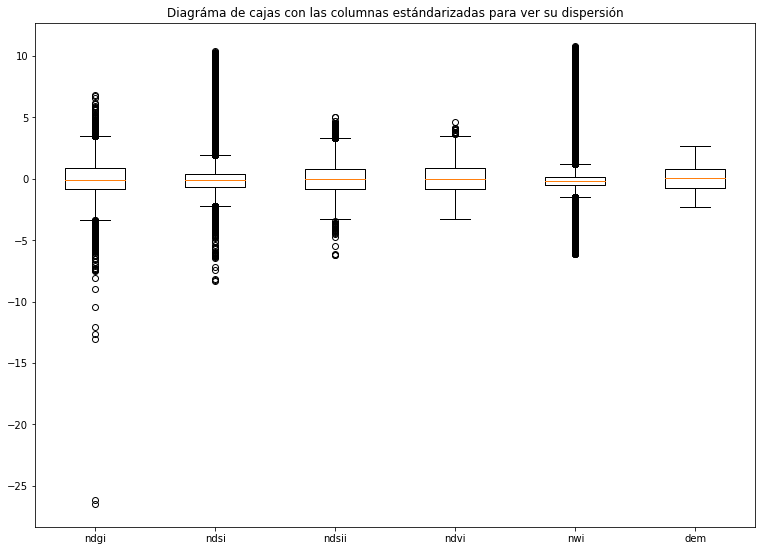

In [36]:
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(standardized_df)
ax.set_xticklabels(['ndgi', 'ndsi',
                    'ndsii', 'ndvi', 'nwi','dem']) 

plt.title("Diagráma de cajas con las columnas estándarizadas para ver su dispersión")
plt.show()

In [37]:
datos_juntos.corr()

,ndgi,ndsi,ndsii,ndvi,nwi,dem
ndgi,1.000000,0.217490,-0.786083,0.848618,-0.100266,-0.805004
ndsi,0.217490,1.000000,0.311181,-0.227599,0.893193,0.014849
ndsii,-0.786083,0.311181,1.000000,-0.994027,0.598679,0.790417
ndvi,0.848618,-0.227599,-0.994027,1.000000,-0.529105,-0.818907
nwi,-0.100266,0.893193,0.598679,-0.529105,1.000000,0.262078
dem,-0.805004,0.014849,0.790417,-0.818907,0.262078,1.000000


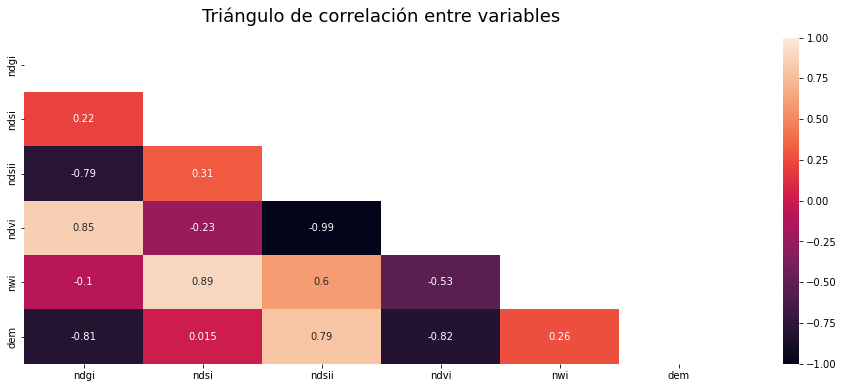

In [38]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(datos_juntos.corr()))
heatmap = sns.heatmap(datos_juntos.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triángulo de correlación entre variables', fontdict={'fontsize':18}, pad=16);


### Se puede notar como la dispersión de los datos en NDGI es muy pequeña, es decir que los datos se acumulan en un intervalo pequeño y por eso es tan alta al igual que NWI. Además se puede corroborar con el boxplot que se ve lo mismo.

### Esta sería como la forma de la "montaña" si la vieramos de lado

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


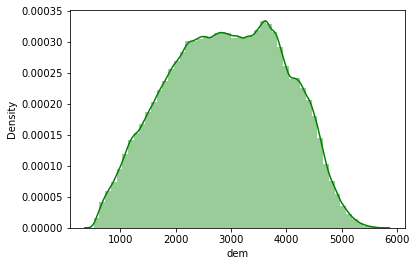

In [42]:


sns.distplot(datos_juntos['dem'],color='g');



In [40]:
datos_juntos.describe(include='object')

,glaciar
count,3164525
unique,2
top,0
freq,3152199


In [41]:
datos_juntos.loc[:,'glaciar'].value_counts()

0    3152199
1      12326
Name: glaciar, dtype: int64

### Proporción de glaciar

In [185]:
no_glaciar = datos_juntos.loc[:,'glaciar'].value_counts()[0]*100/len(datos_juntos.index)
glaciar = 100 - no_glaciar

print("La proporción de no glaciar es", round(no_glaciar,4), "%")
print("La proporción de glaciar es", round(glaciar,4), "%")

La proporción de no glaciar es 99.6105 %
La proporción de glaciar es 0.3895 %
